In [4]:
import sympy
from sympy import init_printing # Latex printing to screen
init_printing(use_latex = 'mathjax')

%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
%matplotlib inline

import numpy as np

from warnings import filterwarnings # Ignoring ugly pink warnings
filterwarnings('ignore')


# Differential Equation

## Motivation

### Saving

Solve  $${ y }_{ 0 },\quad { y }_{ 1 }=b y_0,\quad { y }_{ n }=b{ y }_{ n-1 }$$ 

In [6]:
b,c,d, n, y0 = sympy.symbols("b c d n y0")
y = sympy.Function("y")

### A first order homogeneous difference equation

In [7]:
ode=sympy.Eq(y(n), b*y(n-1))
ode

y(n) = b⋅y(n - 1)

In [8]:
sympy.rsolve(ode,y(n))

    n
C₀⋅b 

This function is usually referred to as the **complementary function/solution** of the general first-order difference equation, when we consider the modified first-order difference equation in which we simply ignore the right-hand-side term d.


### general first-order difference equation

In [9]:
ode=sympy.Eq(y(n+1) + c*y(n), d)
ode

c⋅y(n) + y(n + 1) = d

In [10]:
ode_sol=sympy.rsolve(ode,y(n))
ode_sol

       n     d  
C₀⋅(-c)  + ─────
           c + 1

It is called **general solution** as it is independent of a starting/initial value

In [30]:
ics = {y(0): y0}
ics #initial condition

{y(0): y₀}

In [31]:
C_eq = sympy.Eq(y(n).subs(n, 0).subs(ics), ode_sol.subs(n, 0))
C_eq

            d  
y₀ = C₀ + ─────
          c + 1

In [32]:
C_sol = sympy.solve(C_eq)
C_sol

⎡⎧    c⋅y₀ - d + y₀⎫⎤
⎢⎨C₀: ─────────────⎬⎥
⎣⎩        c + 1    ⎭⎦

In [33]:
ode_sol.subs(C_sol[0])

            n                
  d     (-c) ⋅(c⋅y₀ - d + y₀)
───── + ─────────────────────
c + 1           c + 1        

This expression is called the **definite solution** to the general first-order difference equation

### A first order homogeneous differential equation

In [13]:
#https://www.youtube.com/watch?v=4X0SGGrXDiI

a, t, y0 = sympy.symbols("a t y0")
y = sympy.Function("y")

In [14]:
ode=sympy.Eq(y(t).diff(t), a*y(t))
ode

d                
──(y(t)) = a⋅y(t)
dt               

- y: money in bank
- a: interest rate, for example 6%
- t: time year


In [15]:
sympy.classify_ode(ode)

('separable',
 '1st_exact',
 '1st_linear',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'almost_linear_Integral')

In [16]:
ode_sol=sympy.dsolve(ode, y(t), hint="separable")
ode_sol

           a⋅t
y(t) = C₁⋅ℯ   

In [19]:
ode_sol.free_symbols

set([C₁, a, t])

In [20]:
ics = {y(0): y0}

In [21]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [22]:
apply_ics(ode_sol, ics, t, [a])

           a⋅t
y(t) = y₀⋅ℯ   

### Step by step process

In [38]:
ode_sol.lhs

y(t)

In [39]:
ode_sol.lhs.subs(t, 0)

y(0)

In [40]:
ode_sol.rhs

    a⋅t
C₁⋅ℯ   

In [41]:
ics = {y(0): y0}
ics #initial condition

{y(0): y₀}

In [42]:
C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

y₀ = C₁

In [43]:
C_sol = sympy.solve(C_eq)
C_sol

[{C₁: y₀}]

In [44]:
ode_sol=ode_sol.subs(C_sol[0])
ode_sol

           a⋅t
y(t) = y₀⋅ℯ   

In [45]:
ode_sol.rhs

    a⋅t
y₀⋅ℯ   

In [46]:
ode_sol.rhs.subs({y0: 100})

     a⋅t
100⋅ℯ   

In [57]:
y_t = sympy.lambdify((t,a), ode_sol.rhs.subs({y0: 1}), 'numpy')
#def y_t(t,a):
#    return 100*np.exp(t*a)

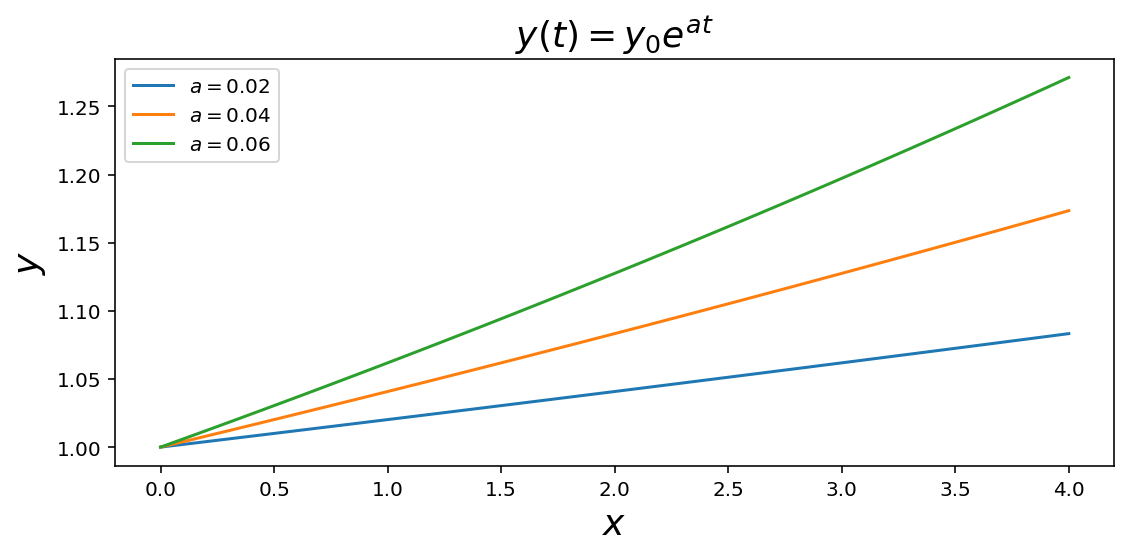

In [58]:

fig, ax = plt.subplots(figsize=(8, 4))

t = np.linspace(0, 4, 100)

for a in [0.02, 0.04, 0.06]:
    ax.plot(t, y_t(t, a), label=r"$a=%.2f$" % a)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

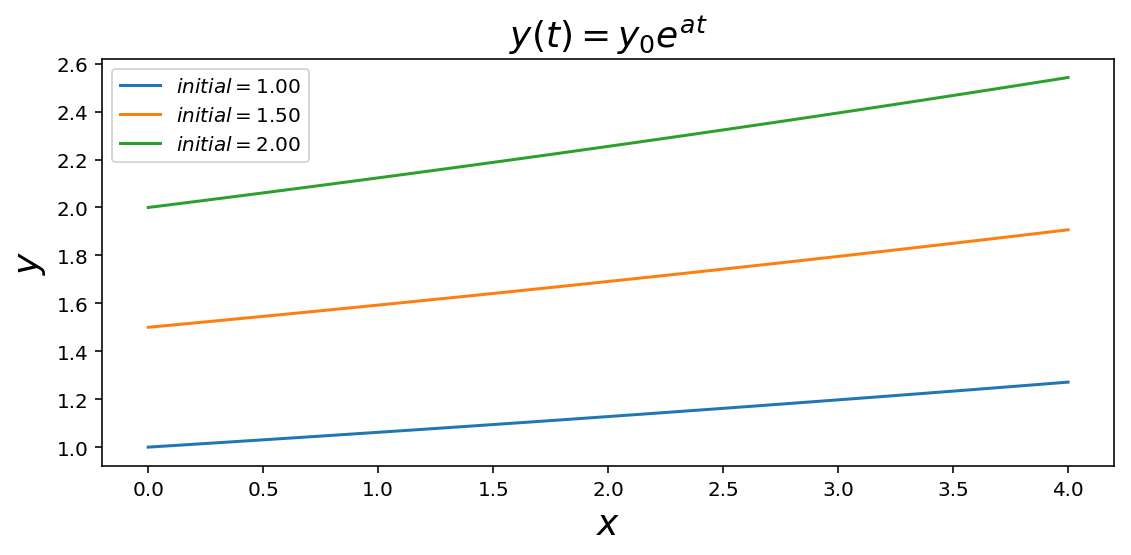

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))

t = np.linspace(0, 4, 100)

for i in [1, 1.5, 2]:
    y_tt = lambda t,a: i*np.exp(a*t)
    ax.plot(t, y_tt(t, 0.06), label=r"$initial=%.2f$" % i)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

### Direction fields

In [100]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5),head_width=0.01,ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    #dx = x_vec[1] - x_vec[0]
    #dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            #Dy = f_np(xx, yy) * dx
            #Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            #Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)            
            #ax.plot([xx - Dx/2, xx + Dx/2],
            #        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
            m=f(xx,yy)
            h=0.25/np.sqrt(1.+m**2)
            ax.plot([xx-h,xx+h],[yy-m*h,yy+m*h],'b')
            ax.arrow(xx-h,yy-m*h,2*h,2*m*h, head_width=0.01, head_length=0.1, fc='b', ec='b')             
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

In [101]:
f = lambda x,y: 0.06*y

def yexact(t,t0,y0):       # exact solution y(x) that satisfies y(x0)=y0
    y =y0*np.exp(0.06*t)
    return y

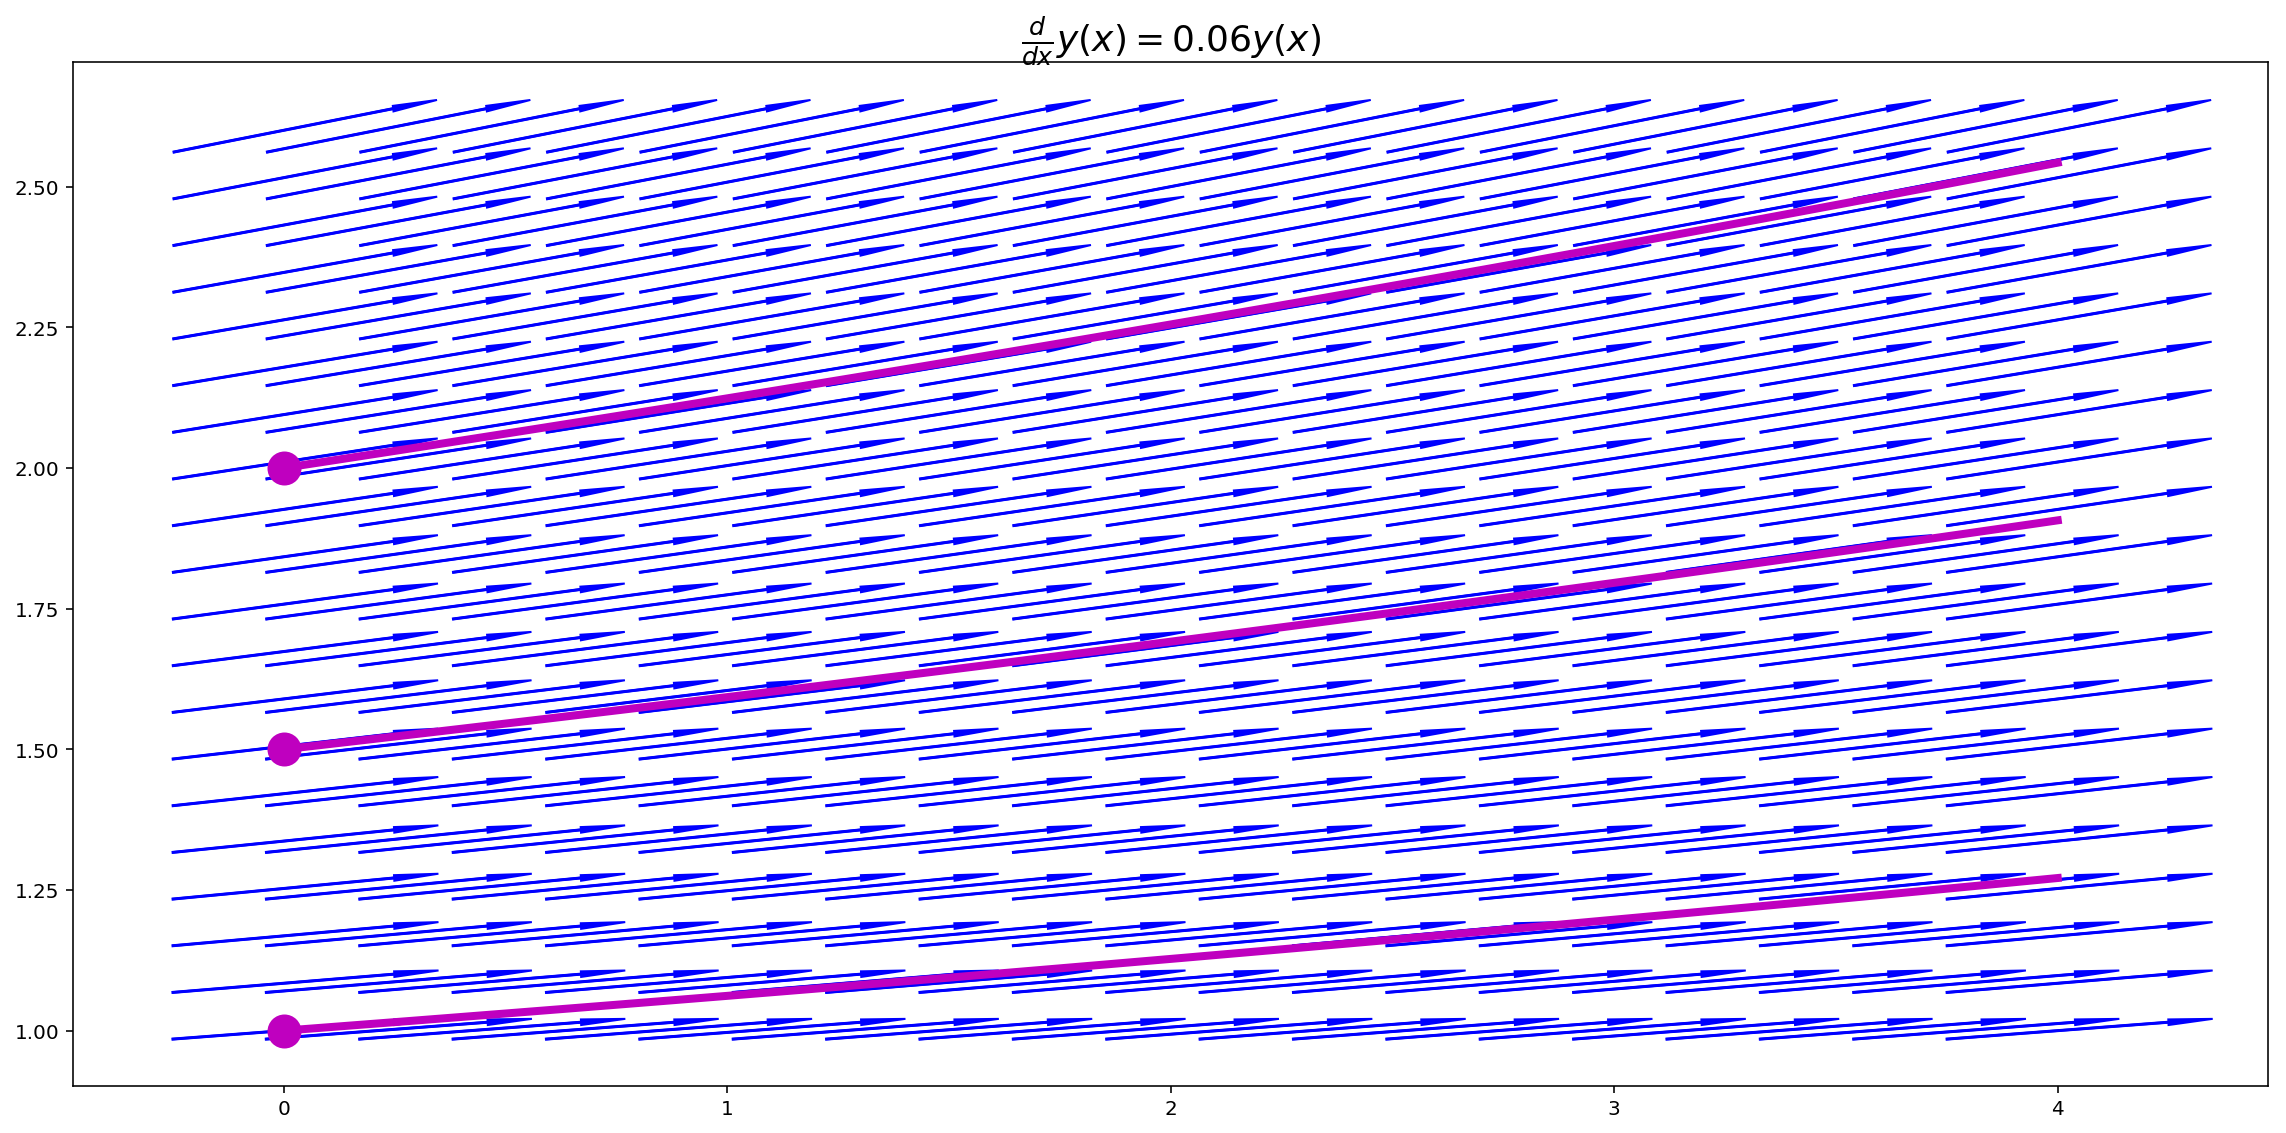

In [102]:
x = sympy.symbols("x")
y = sympy.Function("y")

fig, ax = plt.subplots( figsize=(16, 8))

plot_direction_field(x, y(x), 0.06*y(x), x_lim=(0, 4), y_lim=(1, 2.6), ax = ax)

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y0=1
ax.plot([t0],[y0],'mo',markersize = 16) # 'm'agenta d'o't
X=np.linspace(0,4,101)  # t[0]=0., .., t[100]=4.
Y=[yexact(t,t0,y0) for t in X]
ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y0=1.5
ax.plot([t0],[y0],'mo',markersize = 16) # 'm'agenta d'o't
X=np.linspace(0,4,101)  # t[0]=0., .., t[100]=4.
Y=[yexact(t,t0,y0) for t in X]
ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y0=2
ax.plot([t0],[y0],'mo',markersize = 16) # 'm'agenta d'o't
X=np.linspace(0,4,101)  # t[0]=0., .., t[100]=4.
Y=[yexact(t,t0,y0) for t in X]
ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta




fig.tight_layout()


## A linear first order ordinary differential equation

$$ {a}_{1} \left( t \right) \frac{dy}{dt} + {a}_{0} \left( t \right) y = g \left( t \right) $$

A linear equation can either be **homogeneous**, which is when $ g \left( t \right) = 0 $ or **nonhomogeneous** when $ g \left( t \right) \ne 0 $.

## The standard form

In order to develop an analytical method for solving these equation, we write a linear ODE in **standard from**.  In this form the coefficient of $ y' \left( t \right) = 1 $.  To do this we divide throughout by $ {a}_{1} \left( t \right) $:
$$ \frac{dy}{dt} + \frac{{a}_{0} \left( t \right)}{{a}_{1} \left( t \right)} y = \frac{g \left( t \right)}{{a}_{1} \left( t \right)} \\ \frac{dy}{dt} + P \left( t \right) y = f \left( t \right) $$


when we say we are solving a differential equation, we mean that we attempt to an explicit expression for f as a function of x.

The analystical method for solving a linear ODE provides our family of solutions with two parts:
$$ y \left( t \right) = {y}_{c} \left( t \right) + {y}_{p} \left( t \right) $$



Here $ {y}_{c} \left( t \right)  $ is associated with the homogeneous function, i.e. $ f \left( t \right) = 0 $ 


and $ {y}_{p} $ is the **particular solution**, when we restrict our focus momentarily by asking what the solution would be if we imposed the restriction that it be a constant over time.

we may simply compute the particular and complementary solution, add them up to obtain the general solution, and finally determine the arbitrary constant C by using the initial condition.

## Separable variables

Now that we have seen the easiest example, we are ready for the definition of a separable variabe ODE.  It is simple to see from the following form:
$$ \frac{dy}{dt} = f \left( y \right) g \left( t \right) $$



Through *algebraic* manipulation we can get variables separated by the equal sign.  We are then left with an equation that is solvable by taking the derivative of both sides:
$$ \frac{1}{f \left( y \right)} dy = g \left( t \right) d \left( t \right) $$




Let's do this example:
$$ y' \left( t \right) = \frac{-t}{y} $$


Leibniz notation is best for these kind of probelms.
$$ \frac { dy }{ dt } =\frac { -t }{ y } \\ ydy=-tdt\\ \int { y } dy=-\int { t } dt\\ \frac { 1 }{ 2 } { y }^{ 2 }=-\left( \frac { 1 }{ 2 } { t }^{ 2 }+c \right) \\ \frac { 1 }{ 2 } { y }^{ 2 }=-\frac { 1 }{ 2 } { t }^{ 2 }-c\\ { y }^{ 2 }=c-{ t }^{ 2 }\\ y=\pm \sqrt { c-{ t }^{ 2 } }  $$


So, we have seen another form of classification, namely *separable* as in a *separable ODE*.  We can add this to the *ordinary* and *linear* classifications that we saw before.

## The integrating factor


We start of with the homogeneous form of our linear ODE and use a technique calle **variation of parameters**.  In the homogeneous form we can use a technique that we know well and that is the separation of variables:
$$ \frac { dy }{ dt } +P\left( t \right) y=0\\ \frac { dy }{ dt } =-P\left( t \right) y\\ \frac { 1 }{ y } dy=-P\left( t \right) dt\\ \ln { \left| y \right|  } =-\int { P\left( t \right)  } dt\\ y\left( t \right) ={ e }^{ -\int { P\left( t \right)  } dt } $$


This $ { e }^{ \int { P\left( t \right)  } dt }$ is called the **integrating factor** and when we multiply our linear ODE throughout by this integrating function we have something very interesting.




An example makes this clear:
$$ \frac{dy}{dx} -4y = 0 $$

This is a separable ODE, so let's solve it using the technique that we know:
$$ \frac { dy }{ dt } -4y=0\\ \frac { dy }{ dt } =4y\\ \frac { 1 }{ y } dy=4dt\\ \int { \frac { 1 }{ y }  } dy=4\int { dt } \\ \ln { \left| y \right|  } =4t+c\\ y\left( t \right) ={ e }^{ 4t+c }\\ y\left( t \right) ={ e }^{ c }{ e }^{ 4t }\\ y\left( t \right) =c{ e }^{ 4t } $$

## the technique of variation of parameters.  

We note that the coefficient of $ y' \left( t \right) $ is already one.  That makes $ P \left( t \right) = -4 $.  Furthermore the ODE is homogeneous.

The integrating factor is:
$$ {e}^{\int{P \left( t \right) } dt } \\ = {e}^{ \int{-4} dt } \\ = {e}^{ -4t } $$

Now, let's multiply thoughout by the integrating factor:
$$ { e }^{ -4t }\frac { dy }{ dt } -4y{ e }^{ -4t }=0 $$

Remember how to differrentiate the product of two function?
$$ \frac { d }{ dt } \left( uv \right) =u'v+uv' $$


If $ u = y $ and $ v = {e}^{-4t} $ then we actually have the following:
$$ uv'+u'v\quad =\quad { e }^{ -4t }\frac { dy }{ dt } -4y{ e }^{ -4t } $$


We can rewrite this as:
$$ \frac { d }{ dt } \left[ y\left( t \right) { e }^{ -4t } \right] =0\\ \int { \frac { d }{ dt } \left[ y\left( t \right) { e }^{ -4t } \right]  } dt=\int { 0 } dt\\ y\left( t \right) { e }^{ -4t }=c $$


we integrated both sides with respect to $ t $.  On the left-hand side the integral and derivative *cancel out* and on the right-hand side that we end up with a constant.  We can see this because, going in reverse, the derivative of a constant is $ 0 $.

### Example 1

In [50]:
a, t, y0 = sympy.symbols("a t y_0")
y = sympy.Function("y")
ex1 = y(t).diff(t) + 4 * t * y(t)
ex1

           d       
4⋅t⋅y(t) + ──(y(t))
           dt      

In [51]:
sympy.dsolve(ex1)

               2
           -2⋅t 
y(t) = C₁⋅ℯ     

Here is the long way:
$$ \frac { dy }{ dt } +4ty=0\\ P\left( t \right) =4t\\ { e }^{ \int { P\left( t \right)  } dt }={ e }^{ 4\int { t } dt }={ e }^{ 2{ t }^{ 2 } }\\ { e }^{ 2{ t }^{ 2 } }\frac { dy }{ dt } +4t{ e }^{ 2{ t }^{ 2 } }y=0\\ u=y,v={ e }^{ 2{ t }^{ 2 } }\\ \frac { d }{ dt } \left[ { ye }^{ 2{ t }^{ 2 } } \right] =0\\ \int { \frac { d }{ dt } \left( y{ e }^{ 2{ t }^{ 2 } } \right)  } dt=\int { 0 } dt\\ y{ e }^{ 2{ t }^{ 2 } }=c\\ y\left( t \right) =c{ e }^{ -2{ t }^{ 2 } } $$

### Example 2
Now for a nonhomogeneous linear ODE:
$$ t \frac{dy}{dt} - 4 y = {t}^{6} {e}^{t} $$

In [52]:
ex2 = t * y(t).diff(t) - 4 * y(t) - (t**6 * sympy.exp(t))
ex2

   6  t     d                
- t ⋅ℯ  + t⋅──(y(t)) - 4⋅y(t)
            dt               

In [53]:
sympy.dsolve(ex3)

        4 ⎛        t    t⎞
y(t) = t ⋅⎝C₁ + t⋅ℯ  - ℯ ⎠

By hand this will be:
$$ t\frac { dy }{ dt } -4y={ t }^{ 6 }{ e }^{ t }\\ \frac { dy }{ dt } -\frac { 4 }{ t } y={ t }^{ 5 }{ e }^{ t }\\ P\left( t \right) =\frac { -4 }{ t } \\ { e }^{ \int { P\left( t \right)  } dt }={ e }^{ -4\int { \frac { 1 }{ t }  } dt }={ e }^{ -4\ln { \left| t \right|  }  }={ e }^{ \ln { \left( { t }^{ -4 } \right)  }  }={ t }^{ -4 }\quad \dots [1]\\ \therefore { t }^{ -4 }\frac { dy }{ dt } -{ t }^{ -4 }\frac { 4 }{ t } y={ t }^{ -4 }{ t }^{ 5 }{ e }^{ t }\\ { t }^{ -4 }\frac { dy }{ dt } -\frac { 4 }{ { t }^{ 5 } } y=t{ e }^{ t }\\ u=y,v={ t }^{ -4 }\\ \frac { d }{ dt } \left( y{ t }^{ -4 } \right) =t{ e }^{ t }\\ \int { \frac { d }{ dt } \left( y{ t }^{ -4 } \right)  } dt=\int { t{ e }^{ t } } dt\\ u=t,v'={ e }^{ t }\quad \dots [2]\\ u'=1,v={ e }^{ t }\\ \int { uv' } =uv-\int { u'v } \\ \therefore \int { t{ e }^{ t } } dt={ te }^{ t }-\int { { e }^{ t } } dt={ te }^{ t }-{ e }^{ t }+c\\ \frac { y\left( t \right)  }{ { t }^{ 4 } } ={ te }^{ t }-{ e }^{ t }+c\\ y\left( t \right) ={ t }^{ 4 }\left( { te }^{ t }-{ e }^{ t }+c \right) ={ t }^{ 5 }-{ t }^{ 4 }{ e }^{ t }+c{ t }^{ 4 }  $$

In [2]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())